In [ ]:
# !pip install pystan==2.19.1.1
# !pip install prophet
# !pip install plotly


In [1]:
# Python
import pandas as pd
from prophet import Prophet
import os
os.listdir()
path = open('document.txt', 'r').read().strip()

In [2]:
files = os.listdir(path)
files.sort()
print(files)
print(path + files[0])
test_data_street = files[-1]
files = files[:-1]
print(files)
print(test_data_street)


['2015_street.feather', '2016_street.feather', '2017_street.feather', '2018_street.feather', '2019_street.feather', '2020_street.feather']
C:\Users\20192638\Documents\Data Challenge 22015_street.feather
['2015_street.feather', '2016_street.feather', '2017_street.feather', '2018_street.feather', '2019_street.feather']
2020_street.feather


## Notes Police forces
apparently 'Greater Manchester Police' force was removed from 2020 to 2021 <br><br>
'Police Service of Northern Ireland' is included from 2011 onwards

## idea
instead of only count of crimes we can implement a weighted count where more severe crimes have more effect on the total count

In [3]:
df_data = pd.read_feather(f"{path}/{files[4]}")
df_data['Crime type'].value_counts()

Violence and sexual offences    1883205
Anti-social behaviour           1311848
Criminal damage and arson        549655
Other theft                      520104
Vehicle crime                    447553
Public order                     436909
Burglary                         384606
Shoplifting                      359312
Drugs                            175808
Theft from the person            110894
Other crime                      103584
Bicycle theft                     88126
Robbery                           87075
Possession of weapons             46923
Name: Crime type, dtype: int64

In [8]:
def District_data(district, allYears, crime):
    df_district = pd.DataFrame([])
    if allYears:
        for i in files:
            df_new = pd.read_feather(f"{path}/{i}")
            df_new = df_new[df_new['Falls within']==district]
            df_new = df_new[df_new['Crime type']==crime]
            df_district = pd.concat([df_district, df_new], ignore_index=True)
            
    #only last year's data
    else:
        df_district = pd.read_feather(f"{path}/{files[-1]}")
        df_district = df_district.loc[df_district['Falls within']==district]
        df_district = df_district.loc[df_district['Crime type']==crime]

    return df_district

df_data = District_data(district='South Wales Police', allYears=True, crime='Violence and sexual offences')

In [9]:
df_data.head(5)
df_data['Crime type'].value_counts()

Violence and sexual offences    174715
Name: Crime type, dtype: int64

In [33]:

def Count_by_district(district):
    df_data = pd.DataFrame([])
    for i in files:
        if 'df_data' not in globals():
            df_data = pd.read_feather(f"{path}/{i}")
            df_data = df_data[['Month', 'Falls within']]
            df_data = df_data[df_data['Falls within']==district]
        else:
            df_new = pd.read_feather(f"{path}/{i}")
            df_new = df_new[['Month', 'Falls within']]
            df_new = df_new[df_new['Falls within']==district]
            df_data = pd.concat([df_data, df_new], ignore_index=True)

    return df_data

df_district_count = Count_by_district(district='South Wales Police')
df_district_count.head(5)




2015_street.feather
2016_street.feather
2017_street.feather
2018_street.feather
2019_street.feather
2020_street.feather


,Month,Falls within
0,2015-12,South Wales Police
1,2015-12,South Wales Police
2,2015-12,South Wales Police
3,2015-12,South Wales Police
4,2015-12,South Wales Police


In [53]:
print(df_district_count['Falls within'].value_counts())
print(df_district_count['Month'].value_counts())
df_district_count['Falls within'].value_counts().mean()

South Wales Police    837554
Name: Falls within, dtype: int64
2020-05    15541
2020-04    14346
2018-07    14018
2020-06    13357
2020-07    13098
           ...  
2016-01     9689
2015-12     9667
2016-02     9660
2015-01     9280
2015-02     8897
Name: Month, Length: 72, dtype: int64


837554.0

In [47]:
print(df_data['Falls within'].value_counts())
print(df_data['Month'].value_counts())
df_data['Falls within'].value_counts().mean()

South Wales Police    837554
Name: Falls within, dtype: int64
2020-05    15541
2020-04    14346
2018-07    14018
2020-06    13357
2020-07    13098
           ...  
2016-01     9689
2015-12     9667
2016-02     9660
2015-01     9280
2015-02     8897
Name: Month, Length: 72, dtype: int64


837554.0

In [11]:
#district = df_data[df_data['Falls within']=='South Wales Police']
#del df_data
district = df_data.copy()
predict = {}

district = district.sort_values(by=['Month'])
months = district['Month'].unique()
for i in months:
    predict[i] = len(district[district['Month']==i])
predict = pd.DataFrame({'ds': list(predict.keys()), 'y': list(predict.values())})
predict['ds'] = pd.to_datetime(predict['ds'])

{'2015-01': 1892, '2015-02': 1747, '2015-03': 1985, '2015-04': 1839, '2015-05': 2147, '2015-06': 2348, '2015-07': 2296, '2015-08': 2212, '2015-09': 2251, '2015-10': 2316, '2015-11': 2179, '2015-12': 2270, '2016-01': 2354, '2016-02': 2198, '2016-03': 2507, '2016-04': 2571, '2016-05': 2882, '2016-06': 2569, '2016-07': 2706, '2016-08': 2813, '2016-09': 2775, '2016-10': 2896, '2016-11': 2846, '2016-12': 2654, '2017-01': 2777, '2017-02': 2555, '2017-03': 3034, '2017-04': 2764, '2017-05': 3024, '2017-06': 2934, '2017-07': 3073, '2017-08': 2951, '2017-09': 2895, '2017-10': 3162, '2017-11': 2999, '2017-12': 3006, '2018-01': 2989, '2018-02': 2751, '2018-03': 2969, '2018-04': 2960, '2018-05': 3322, '2018-06': 3450, '2018-07': 3801, '2018-08': 3464, '2018-09': 3321, '2018-10': 3359, '2018-11': 3484, '2018-12': 3292, '2019-01': 3311, '2019-02': 3542, '2019-03': 3687, '2019-04': 3455, '2019-05': 3647, '2019-06': 3708, '2019-07': 3906, '2019-08': 3550, '2019-09': 3625, '2019-10': 3790, '2019-11': 34

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


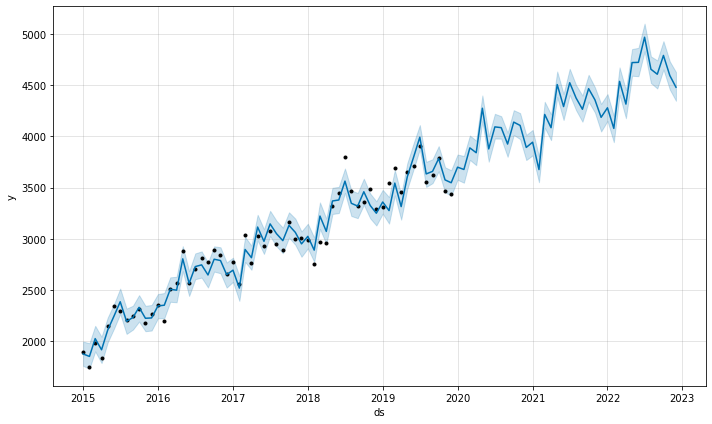

In [12]:
m = Prophet(seasonality_mode='multiplicative').fit(predict)
future = m.make_future_dataframe(periods=36, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)


C:\Users\Arcane\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Arcane\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


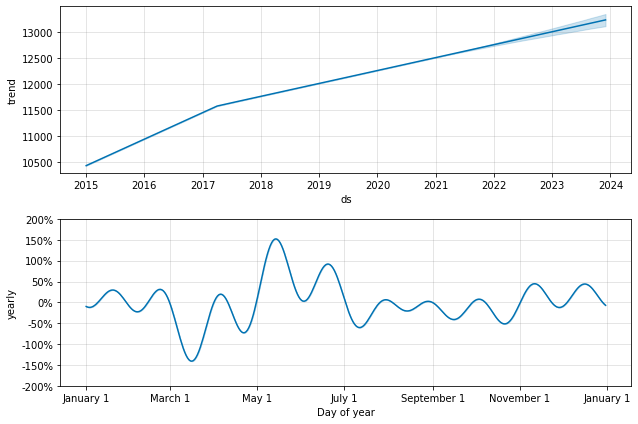

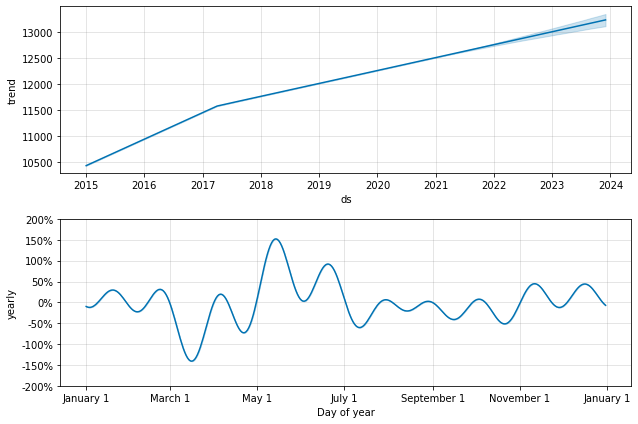

In [52]:
m.plot_components(fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


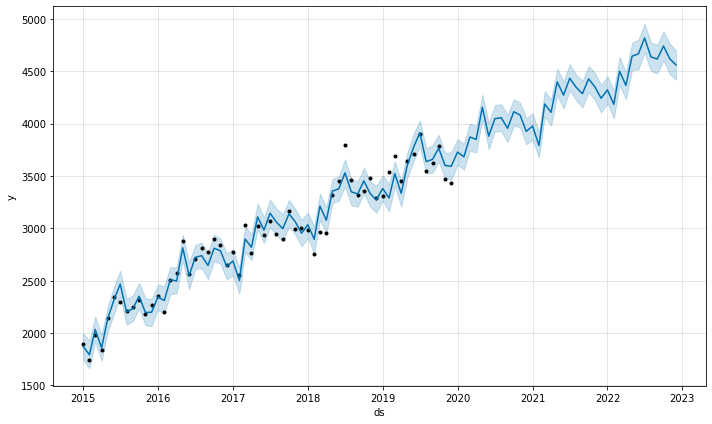

In [14]:
m = Prophet(seasonality_mode='additive').fit(predict)
future = m.make_future_dataframe(periods=36, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Arcane\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Arcane\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Arcane\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before in

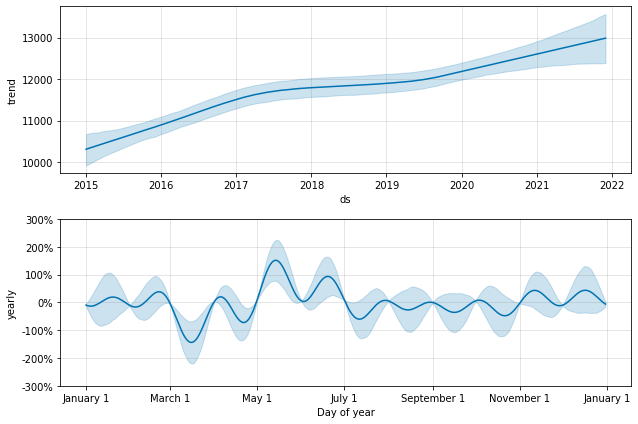

In [41]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(predict)
fcst = m.predict(future)
fig = m.plot_components(fcst)

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
#df_predict = df_data[~df_data.isna()]
#df_predict

In [ ]:
#df_data.loc[[129657]]

In [ ]:
# df_predict = df_data[['Month', 'Longitude', 'Latitude']].reset_index()
# index = df_predict.pop('index')
# df_predict.insert(1, 'index', index)


# df_predict.columns = ['ds', 'y', 'add1', 'add2']

# df_predict
